# CODIGO SIMULACION DE LOGS Y GRAFICO DE DATOS

Lo primero que haremos es importar las librerías que nos permiten realizar el preprocesamiento de los datos, para posteriormente graficarlos y analizar los resultados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Generar 500 registros de logs simulados
np.random.seed(42)

# Lista de eventos de seguridad
eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']

In [5]:
# Generar timestamps para una semana
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

In [6]:
# Ajustar al número de registros deseados
timestamps = timestamps[:500]

# Generar IPs aleatorias
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

# Usuarios del sistema
usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]

# Generar datos simulados
data = {
    'timestamp': timestamps,
    'ip_origen': [random_ip() for _ in range(500)],
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.2, 0.05, 0.05, 0.08, 0.07, 0.03, 0.02]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}

In [7]:
# Crear DataFrame
logs_df = pd.DataFrame(data)

# Configurar timestamp como índice
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

# Ahora creamos las visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribución de Eventos por Severidad')

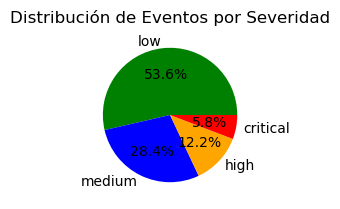

In [8]:
# 2. Distribución de eventos por severidad
plt.subplot(2, 2, 2)
severidad_count = logs_df['severidad'].value_counts()
colors = {'low': 'green', 'medium': 'blue', 'high': 'orange', 'critical': 'red'}
plt.pie(severidad_count, labels=severidad_count.index, autopct='%1.1f%%',
        colors=[colors[sev] for sev in severidad_count.index])
plt.title('Distribución de Eventos por Severidad')